<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/NewJoey_Aviles_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-12 21:54:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-12 21:54:05 (622 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
df = pd.read_csv('./house-votes-84.data')

print(df.shape)
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
column_names=['party', 
               'handicapped-infants', 
               'water-project', 
               'budget', 
               'physician-fee-freeze', 
               'el-salvador-aid', 
               'religious-groups', 
               'anti-satellite-ban', 
               'aid-to-contras', 
               'mx-missile', 
               'immigration', 
               'synfuels', 
               'education', 
               'right-to-sue', 
               'crime', 
               'duty-free', 
               'south-africa']

df = pd.read_csv('house-votes-84.data'
                , header=None
                , names=column_names
                , na_values='?')
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#how many from each party?
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
#Label encoding, and replace ? with Np.NaN in one fell-swoop.
import numpy as np

df = df.replace({'y': 1, 'n': 0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Split the dataset into republicans and democrats

rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
#how did Republicans vote?
rep.head()


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
#how did Democrats vote?
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
#import
import pandas as pd
import scipy.stats as stats

In [0]:
#What is the average support of democrats for rekigious groups?
rg_mean = dem['religious-groups'].mean()

In [0]:
print(rg_mean)

0.47674418604651164


In [0]:
#calculate a 95% confidence interval on either side of this.

conf_int=stats.t.interval(0.95, # alpha (ie, confidence level)
                 dem.shape[0], # length of sample
                 loc = dem['religious-groups'].mean(), # mean
                 scale = stats.sem(dem['religious-groups'], nan_policy='omit') # std error of the mean
                 )
conf_int

(0.41540269593579804, 0.5380856761572252)

In [0]:
#margin of error
0.5380856761572252 - 0.41540269593579804

0.1226829802214272

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


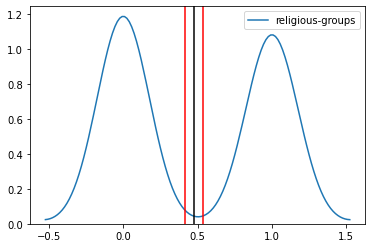

In [0]:
#plot on graph with kernel density estimate
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(dem['religious-groups'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=dem['religious-groups'].mean(), color='k');

The probability of democrats and republican support for religious groups is .48 plus or minus .122

In [0]:
# read back in the earlier data.
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
                 , na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# just the numeric columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
# just the non-numeric columns (ie, categorical)
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# marital status
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

##**Run a X^2 Test "by hand" (Using Numpy)**

In [0]:
# just the non-numeric columns (ie, categorical)
df.describe(exclude='number')


,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
df['marital-status'].value_counts().sort_index()

 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10683
 Separated                 1025
 Widowed                    993
Name: marital-status, dtype: int64

In [0]:
df['education'].value_counts().sort_index()

 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: education, dtype: int64

##**Is there a relationship between the marital status and the education?

Is there a relationship between these two categorical variables

If there is a relationship, I will say that the variables are **'dependent'**

If there is no relationship, I will say that the variables are **'independent'**

##To test this I need an array of observed frequencies:

The chi^2 crosstab is called a "contingency table"

In [0]:
observed_frequencies = pd.crosstab(df['education'], 
                                   df['marital-status'], 
                                   margins=True)
observed_frequencies

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
education,,,,,,,,
10th,120,0,349,15,361,49,39,933
11th,130,0,354,19,586,48,38,1175
12th,39,0,130,8,232,14,10,433
1st-4th,10,0,81,12,39,9,17,168
5th-6th,20,0,172,20,89,18,14,333
7th-8th,73,0,359,14,113,23,64,646
9th,64,0,230,9,155,33,23,514
Assoc-acdm,203,2,460,12,337,30,23,1067
Assoc-voc,234,1,689,13,362,42,41,1382


In [0]:
observed = pd.crosstab(df['education'], 
                       df['marital-status'],
                       margins=True)
#observed = observed
observed.shape

(17, 8)

In [0]:
#The expected value of divorced people with bachelors degrees
(5355 * 4443)/3256

7307.206695331695

In [0]:
# Create row totals (I was confused with the columns and rows
# I didn't know that the row total was the 2 total numbers and 
# that the column total was every column besides the total)

row_sums = observed.iloc[0:17, 7].values #.values turns it to a numpy array
print(row_sums)

[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291 32561]


In [0]:
#Column totals
col_sums = observed.iloc[16, 0:8].values #.values turns it to a numpy array


print(col_sums)
#You can use .T to reshape

[ 4443    23 14976   418 10683  1025   993 32561]


In [0]:
# This is not entirely necessary

# col_sums = np.array([[ 546,    4, 2768,   68, 1795,   92],
#        [  33,    0,  286,    7,   73,    7]])

# col_sums = col_sums.flatten()

In [0]:
#sample size

total_total = df.shape[0]

total_total

32561

What I would expect the values in the table to be if the null hypothesis was true.

In [0]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total_total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(17, 8)
[[1.27309327e+02 6.59039956e-01 4.29120973e+02 1.19773348e+01
  3.06109733e+02 2.93702589e+01 2.84533337e+01 9.33000000e+02]
 [1.60330610e+02 8.29980652e-01 5.40425663e+02 1.50839962e+01
  3.85507970e+02 3.69882682e+01 3.58335125e+01 1.17500000e+03]
 [5.90835355e+01 3.05856700e-01 1.99152606e+02 5.55861306e+00
  1.42063788e+02 1.36305703e+01 1.32050306e+01 4.33000000e+02]
 [2.29238660e+01 1.18669574e-01 7.72693713e+01 2.15669052e+00
  5.51194374e+01 5.28853536e+00 5.12342987e+00 1.68000000e+02]
 [4.54383772e+01 2.35220049e-01 1.53158932e+02 4.27486871e+00
  1.09254599e+02 1.04826326e+01 1.01553699e+01 3.33000000e+02]
 [8.81477227e+01 4.56312767e-01 2.97119130e+02 8.29298854e+00
  2.11947360e+02 2.03356777e+01 1.97008077e+01 6.46000000e+02]
 [7.01361138e+01 3.63072387e-01 2.36407481e+02 6.59844599e+00
  1.68639231e+02 1.61803999e+01 1.56752557e+01 5.14000000e+02]
 [1.45593839e+02 7.53693068e-01 4.90752495e+02 1.36975523e+01
  3.50074046e+02 3.35884954e+01 3.25398790e+01 1.067000

In [0]:
observed.shape

(17, 8)

###**Chi^2 statistic**

In [0]:
chi2 = ((observed - expected)**2 / expected).sum()

In [0]:
chi2, dof, p_value, expected = stats.chi2_contingency(observed)

print(chi2)
print(dof)
print(p_value)
print(expected)

1638.1373573227852
2.7674290822463824e-269
112
[[1.27309327e+02 6.59039956e-01 4.29120973e+02 1.19773348e+01
  3.06109733e+02 2.93702589e+01 2.84533337e+01 9.33000000e+02]
 [1.60330610e+02 8.29980652e-01 5.40425663e+02 1.50839962e+01
  3.85507970e+02 3.69882682e+01 3.58335125e+01 1.17500000e+03]
 [5.90835355e+01 3.05856700e-01 1.99152606e+02 5.55861306e+00
  1.42063788e+02 1.36305703e+01 1.32050306e+01 4.33000000e+02]
 [2.29238660e+01 1.18669574e-01 7.72693713e+01 2.15669052e+00
  5.51194374e+01 5.28853536e+00 5.12342987e+00 1.68000000e+02]
 [4.54383772e+01 2.35220049e-01 1.53158932e+02 4.27486871e+00
  1.09254599e+02 1.04826326e+01 1.01553699e+01 3.33000000e+02]
 [8.81477227e+01 4.56312767e-01 2.97119130e+02 8.29298854e+00
  2.11947360e+02 2.03356777e+01 1.97008077e+01 6.46000000e+02]
 [7.01361138e+01 3.63072387e-01 2.36407481e+02 6.59844599e+00
  1.68639231e+02 1.61803999e+01 1.56752557e+01 5.14000000e+02]
 [1.45593839e+02 7.53693068e-01 4.90752495e+02 1.36975523e+01
  3.50074046e+02

Conclusion: based on a chi^2 value of 1638.1373573227854 and a p-value of ~0, we reject the null hypothesis that maritail obtained by census responders and the education of those responders is independent and suggest the alternative that these two variables are related.

In [0]:
pd.crosstab(df['race'], df['marital-status'], margins=True )

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
race,,,,,,,,
Amer-Indian-Eskimo,60,0,116,9,103,11,12,311
Asian-Pac-Islander,75,0,508,41,372,19,24,1039
Black,485,1,837,62,1346,265,128,3124
Other,26,0,105,15,105,13,7,271
White,3797,22,13410,291,8757,717,822,27816
All,4443,23,14976,418,10683,1025,993,32561


In [0]:
observed_frequencies = pd.crosstab(df['race'], df['marital-status'], margins='True')
observed_frequencies

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
race,,,,,,,,
Amer-Indian-Eskimo,60,0,116,9,103,11,12,311
Asian-Pac-Islander,75,0,508,41,372,19,24,1039
Black,485,1,837,62,1346,265,128,3124
Other,26,0,105,15,105,13,7,271
White,3797,22,13410,291,8757,717,822,27816
All,4443,23,14976,418,10683,1025,993,32561


In [0]:
observed = observed_frequencies

In [0]:
# = pd.crosstab(df['race'], df['marital-status'])
#observed = observed.values
# observed

array([[   60,     0,   116,     9,   103,    11,    12],
       [   75,     0,   508,    41,   372,    19,    24],
       [  485,     1,   837,    62,  1346,   265,   128],
       [   26,     0,   105,    15,   105,    13,     7],
       [ 3797,    22, 13410,   291,  8757,   717,   822]])

In [0]:
observed.shape

(6, 8)

In [0]:
#observed = np.array([[   60,     0,   116,     9,   103,    11,    12],
#        [   75,     0,   508,    41,   372,    19,    24],
#        [  485,     1,   837,    62,  1346,   265,   128],
#        [   26,     0,   105,    15,   105,    13,     7],
#        [ 3797,    22, 13410,   291,  8757,   717,   822]])

#observed = observed.flatten()
#observed

In [0]:
#observed.shape

In [0]:
#Create row totals (I was confused with the columns and rows, I didn't know that the row total was the 2 total numbers and that the column total was every column besides the total)
row_sums = observed_frequencies.iloc[0:6, 7].values #.values turns it to a numpy array
row_sums

array([  311,  1039,  3124,   271, 27816, 32561])

In [0]:
#Column totals
col_sums = observed_frequencies.iloc[5, 0:8].values #.values turns it to a numpy array

col_sums
#You can use .T to reshape

array([ 4443,    23, 14976,   418, 10683,  1025,   993, 32561])

In [0]:
#col_sums = np.array([[   60,     0,   116,     9,   103,    11,    12],
       [   75,     0,   508,    41,   372,    19,    24],
       [  485,     1,   837,    62,  1346,   265,   128],
       [   26,     0,   105,    15,   105,    13,     7],
       [ 3797,    22, 13410,   291,  8757,   717,   822]])

#col_sums = col_sums.flatten()
#col_sums

In [0]:
#sample size

total_total = df.shape[0]

total_total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total_total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(6, 8)
[[4.24364424e+01 2.19679985e-01 1.43040324e+02 3.99244495e+00
  1.02036578e+02 9.79008630e+00 9.48444458e+00 3.11000000e+02]
 [1.41773195e+02 7.33914806e-01 4.77874267e+02 1.33381039e+01
  3.40887473e+02 3.27070729e+01 3.16859740e+01 1.03900000e+03]
 [4.26274746e+02 2.20668898e+00 1.43684236e+03 4.01041737e+01
  1.02495906e+03 9.83415743e+01 9.52713983e+01 3.12400000e+03]
 [3.69783790e+01 1.91425325e-01 1.24642855e+02 3.47894721e+00
  8.89129019e+01 8.53091121e+00 8.26458033e+00 2.71000000e+02]
 [3.79553724e+03 1.96482909e+01 1.27936002e+04 3.57086330e+02
  9.12620399e+03 8.75630355e+02 8.48293603e+02 2.78160000e+04]
 [4.44300000e+03 2.30000000e+01 1.49760000e+04 4.18000000e+02
  1.06830000e+04 1.02500000e+03 9.93000000e+02 3.25610000e+04]]


In [0]:
observed.shape

(6, 8)

In [0]:
chi2 = ((observed - expected)**2 / expected).sum()

In [0]:
chi2, dof, p_value, expected = stats.chi2_contingency(observed)

print(chi2)
print(dof)
print(p_value)
print(expected)

923.8086971524608
2.7906769112696404e-171
35
[[4.24364424e+01 2.19679985e-01 1.43040324e+02 3.99244495e+00
  1.02036578e+02 9.79008630e+00 9.48444458e+00 3.11000000e+02]
 [1.41773195e+02 7.33914806e-01 4.77874267e+02 1.33381039e+01
  3.40887473e+02 3.27070729e+01 3.16859740e+01 1.03900000e+03]
 [4.26274746e+02 2.20668898e+00 1.43684236e+03 4.01041737e+01
  1.02495906e+03 9.83415743e+01 9.52713983e+01 3.12400000e+03]
 [3.69783790e+01 1.91425325e-01 1.24642855e+02 3.47894721e+00
  8.89129019e+01 8.53091121e+00 8.26458033e+00 2.71000000e+02]
 [3.79553724e+03 1.96482909e+01 1.27936002e+04 3.57086330e+02
  9.12620399e+03 8.75630355e+02 8.48293603e+02 2.78160000e+04]
 [4.44300000e+03 2.30000000e+01 1.49760000e+04 4.18000000e+02
  1.06830000e+04 1.02500000e+03 9.93000000e+02 3.25610000e+04]]


Conclusion: based on a chi^2 value of 923.8086971524608 and a p-value of 35, we fail to reject the null hypothesis that maritail obtained by census responders and the education of those responders is independent.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)